In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as mt

In [2]:
import sys
from pathlib import Path
import os
sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "regression_paths", "diamonds_price_dataset_path")

Extracting : 100%|██████████| 1/1 [00:00<00:00, 50.05it/s]


In [3]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [124]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
print(data.head())
print(data.shape)
print(data.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
(53940, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float

In [125]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [126]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

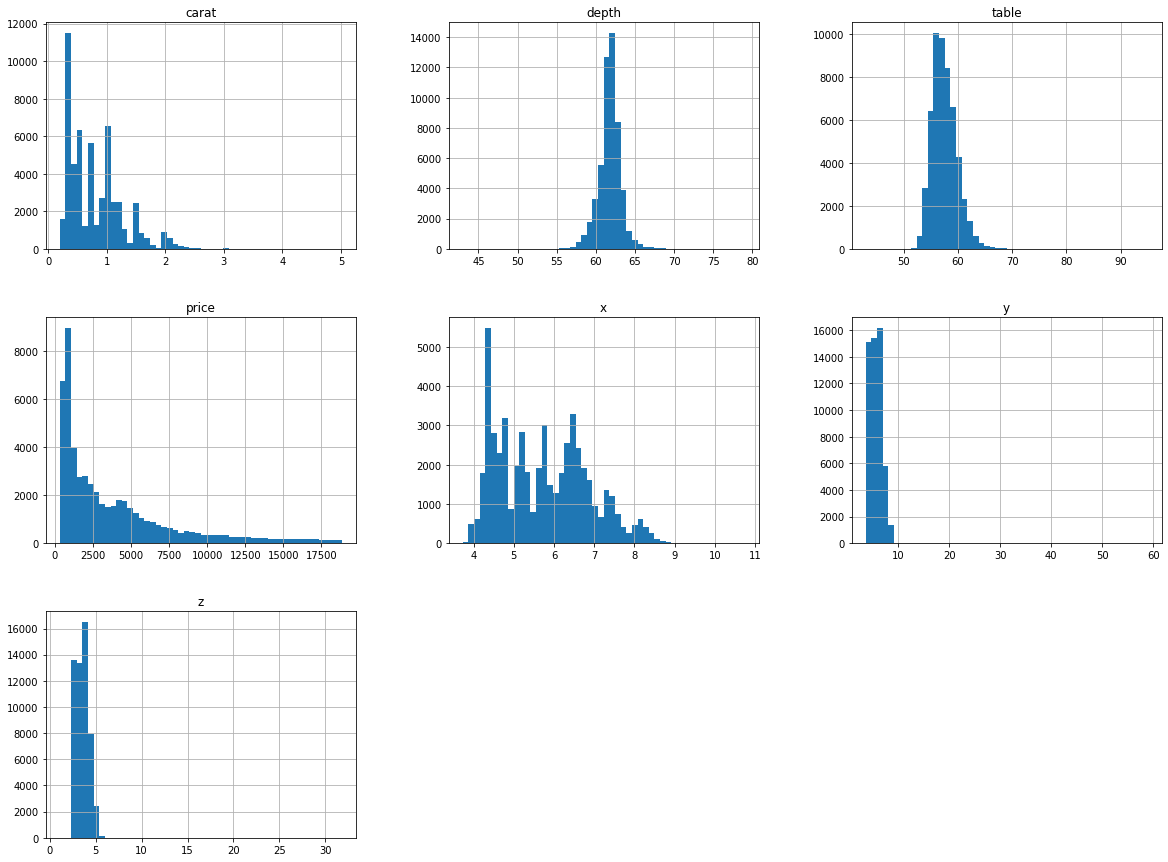

In [127]:
data.hist(bins=50,figsize=(20,15))
plt.show()

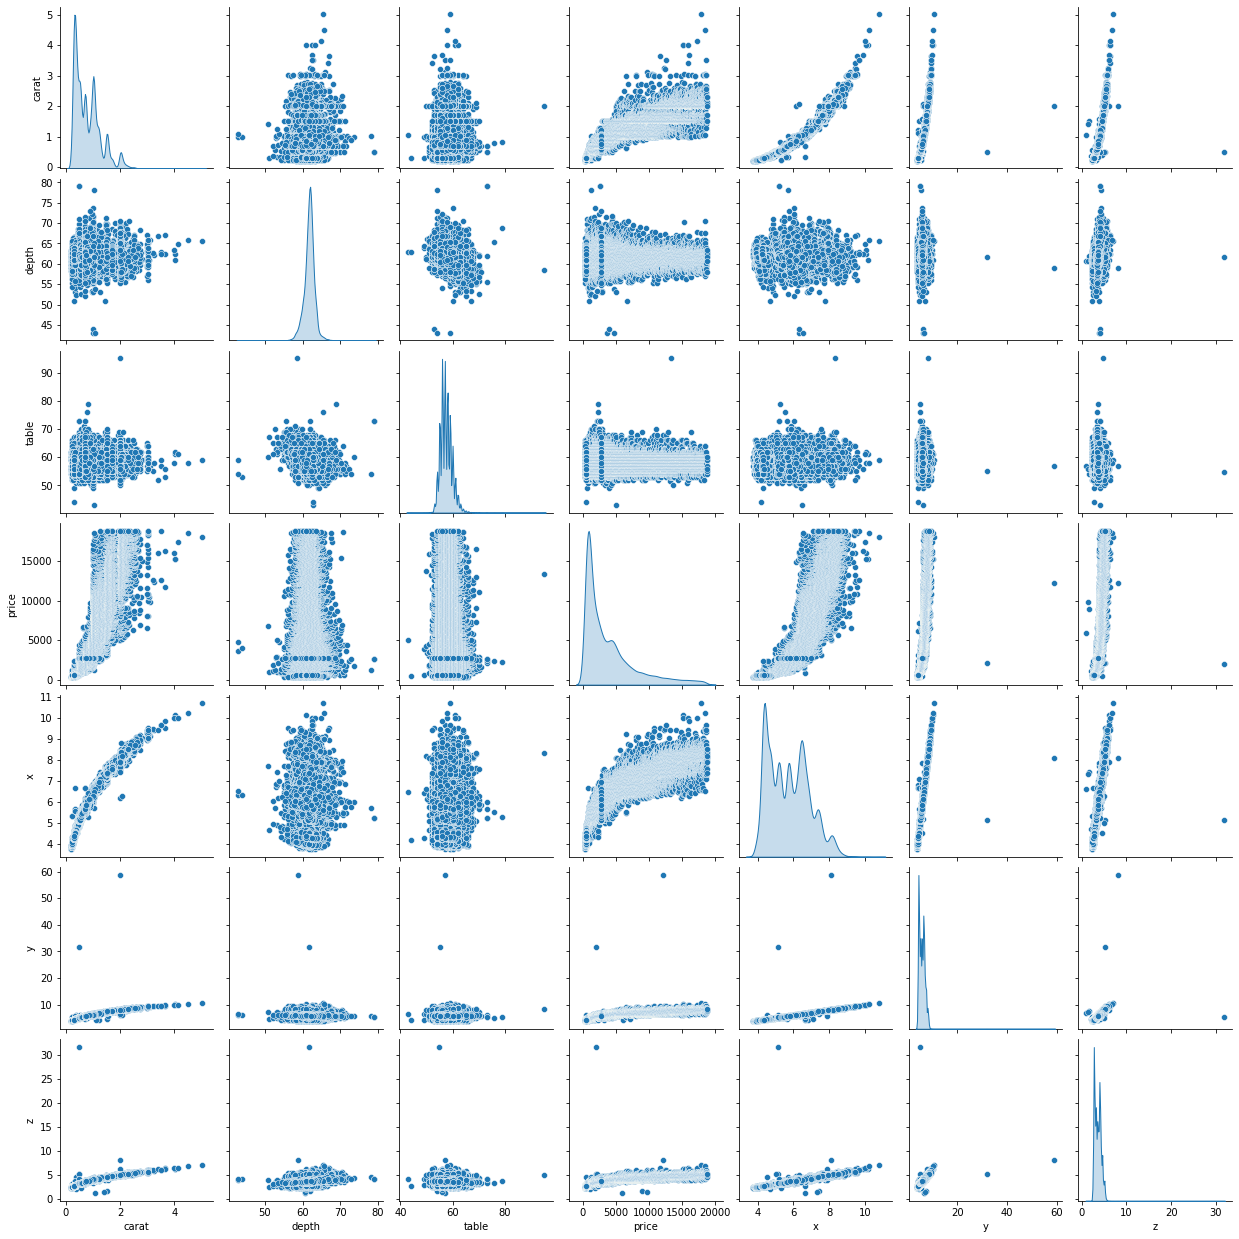

In [128]:
sns.pairplot(data , diag_kind = 'kde');

In [129]:
data['vol'] = data.x * data.y * data.z
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [130]:
data.drop(['x','y','z'], axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [131]:
def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

data = remove_outlier(data, 'vol')

print(data.shape)

(52597, 8)


In [132]:
def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

data = remove_outlier(data, 'vol')

print(data.shape)

(52169, 8)


In [133]:
def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

data = remove_outlier(data, 'carat')

print(data.shape)

(51757, 8)


In [134]:
def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

data = remove_outlier(data, 'depth')

print(data.shape)

(48758, 8)


In [135]:
def remove_outlier(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
  return df_out

data = remove_outlier(data, 'table')

print(data.shape)

(48425, 8)


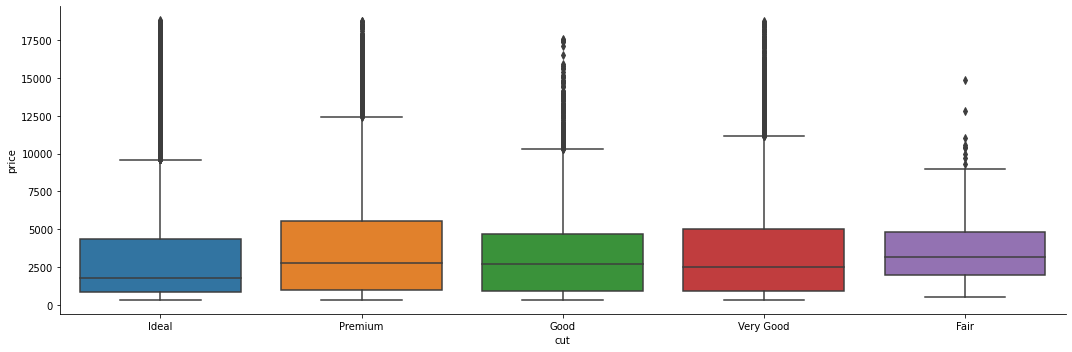

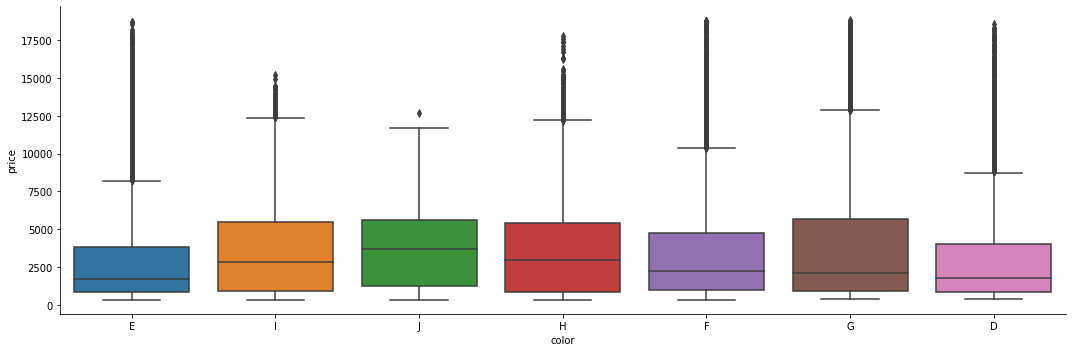

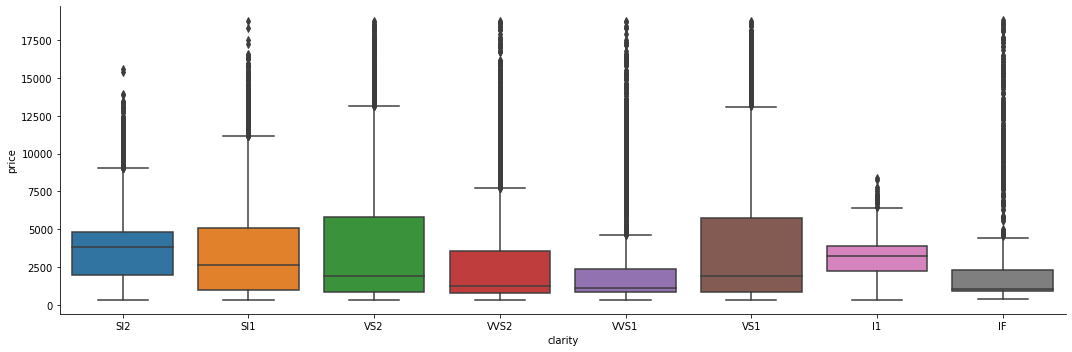

In [136]:
input_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 5, aspect = 3,data=data);

In [137]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.cut)
data.cut = le.transform(data.cut)
le.fit(data.color) 
data.color = le.transform(data.color)
le.fit(data.clarity) 
data.clarity = le.transform(data.clarity)

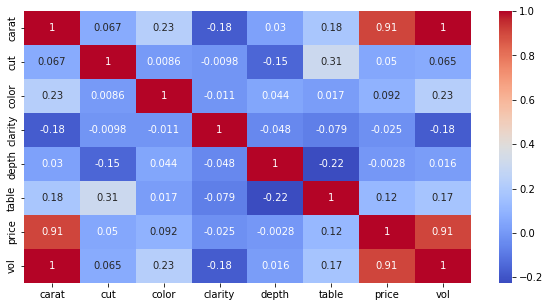

In [138]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

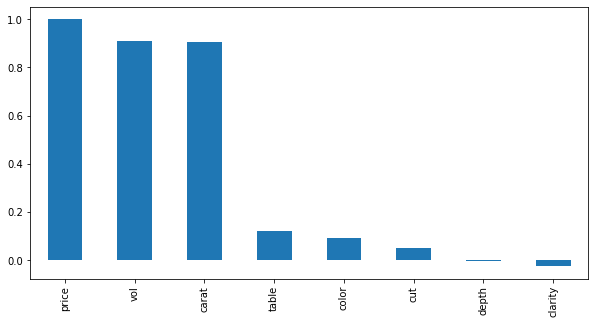

In [139]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [140]:
data.corr()['price'].sort_values(ascending=False).abs()

price      1.000000
vol        0.908229
carat      0.906734
table      0.119450
color      0.091839
cut        0.049831
depth      0.002828
clarity    0.025058
Name: price, dtype: float64

In [141]:
data.head()

,carat,cut,color,clarity,depth,table,price,vol
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250
5,0.24,4,6,7,62.8,57.0,336,38.693952


In [142]:
from sklearn import preprocessing
columns = data.columns
for i in columns:
    if data.dtypes[i] is object:
        print("Cannot process object data")
    

## if skew is 0.5 and -0.5 i.e its normal distribution and use scaler else normalise
scale_list = []
normalise_list = []
data_skew = data.skew()

for i in columns:
    if data_skew[i] >= -0.5 and data_skew[i] <= 0.5:
        scale_list.append(i)
    else:
        normalise_list.append(i)
print(scale_list)
print(normalise_list)

#standard_scaler = preprocessing.StandardScaler()
#standard_scaler.fit()

['cut', 'color', 'clarity', 'depth', 'table']
['carat', 'price', 'vol']


In [143]:
col_names = ['depth']
features = data[col_names]
scaler = preprocessing.StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data[col_names] = features
print(data)

       carat  cut  color  clarity     depth  table  price         vol
0       0.23    2      1        3 -0.286095   55.0    326   38.202030
1       0.21    3      1        2 -1.889464   61.0    326   34.505856
3       0.29    3      5        5  0.562748   58.0    334   46.724580
4       0.31    1      6        3  1.411590   58.0    335   51.917250
5       0.24    4      6        7  0.940011   57.0    336   38.693952
...      ...  ...    ...      ...       ...    ...    ...         ...
53935   0.72    2      0        2 -0.946306   57.0   2757  115.920000
53936   0.72    1      0        2  1.222959   55.0   2757  118.110175
53937   0.70    4      0        2  0.940011   60.0   2757  114.449728
53938   0.86    3      4        3 -0.757674   58.0   2757  140.766120
53939   0.75    2      0        3  0.374116   55.0   2757  124.568444

[48425 rows x 8 columns]


In [144]:
col_names = ['carat', 'table', 'vol']
features = data[col_names]
scaler = preprocessing.MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
data[col_names] = features
print(data)

          carat  cut  color  clarity     depth     table  price       vol
0      0.017045    2      1        3 -0.286095  0.263158    326  0.022433
1      0.005682    3      1        2 -1.889464  0.789474    326  0.009665
3      0.051136    3      5        5  0.562748  0.526316    334  0.051872
4      0.062500    1      6        3  1.411590  0.526316    335  0.069809
5      0.022727    4      6        7  0.940011  0.438596    336  0.024132
...         ...  ...    ...      ...       ...       ...    ...       ...
53935  0.295455    2      0        2 -0.946306  0.438596   2757  0.290896
53936  0.295455    1      0        2  1.222959  0.263158   2757  0.298462
53937  0.284091    4      0        2  0.940011  0.701754   2757  0.285817
53938  0.375000    3      4        3 -0.757674  0.526316   2757  0.376723
53939  0.312500    2      0        3  0.374116  0.263158   2757  0.320771

[48425 rows x 8 columns]


In [145]:
X = data.drop(['price'], axis=1)
X.head()

,carat,cut,color,clarity,depth,table,vol
0,0.017045,2,1,3,-0.286095,0.263158,0.022433
1,0.005682,3,1,2,-1.889464,0.789474,0.009665
3,0.051136,3,5,5,0.562748,0.526316,0.051872
4,0.062500,1,6,3,1.411590,0.526316,0.069809
5,0.022727,4,6,7,0.940011,0.438596,0.024132


In [146]:
y = data['price']
y.head()

0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as sl
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_hat = pd.DataFrame(x_quad)
print(X_hat.shape)
X_train,X_test,y_train,y_test = train_test_split(X_hat,y,test_size=0.25, random_state = 0)
linreg = sl.LinearRegression()
linreg.fit(X_train, y_train)

(48425, 36)


LinearRegression()

In [149]:
print('R squared of the Linear Regression on training set: {:.2%}'.format(linreg.score(X_train, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 92.43%
R squared of the Linear Regression on test set: 91.67%


<AxesSubplot:xlabel='price'>

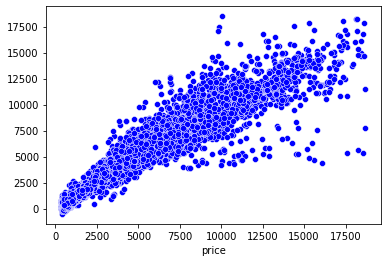

In [150]:
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")

In [151]:
from sklearn.metrics import mean_absolute_error as mae
score = linreg.score(X_test,y_test)
error = mae(y_test,y_pred)
y_true, Y_pred = np.array(y_test), np.array(y_pred)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.9167306957940884
557.981061908522
22.50240755710607
15.749361666614861


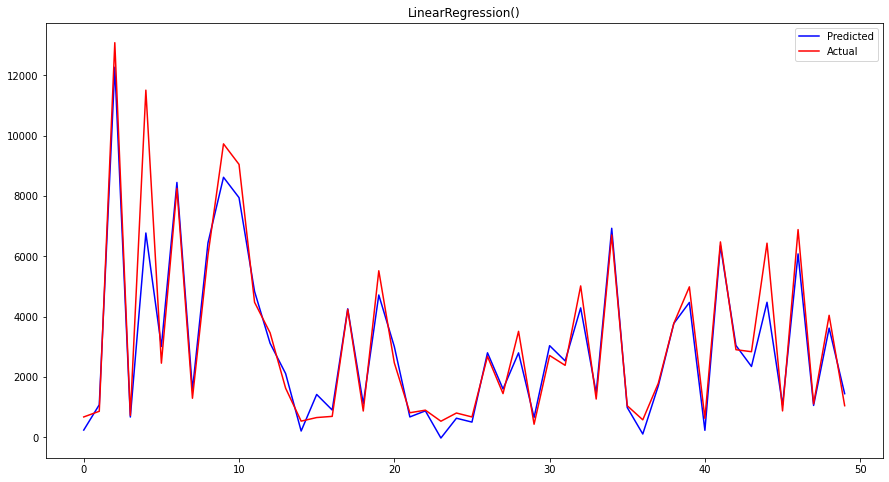

In [152]:
  plt.figure(figsize=(15, 8))
  y_true, y_pred = np.array(y_test), np.array(y_pred)
  plt.plot(y_pred[0:50], label='Predicted', color="blue")
  plt.plot(y_true[0:50], label='Actual', color="red")
  plt.title(linreg)
  plt.legend()

In [153]:
import sklearn.tree as st
tree = st.DecisionTreeRegressor(random_state=42)
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_hat = pd.DataFrame(x_quad)
print(X_hat.shape)
X_train,X_test,y_train,y_test = train_test_split(X_hat,y,test_size=0.25, random_state = 0)
tree.fit(X_train, y_train)

(48425, 36)


DecisionTreeRegressor(random_state=42)

In [154]:
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree.score(X_train, y_train)))
print('R squared of the Decision Tree Regressor on test set: {:.2%}'.format(tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 97.02%


<AxesSubplot:xlabel='price'>

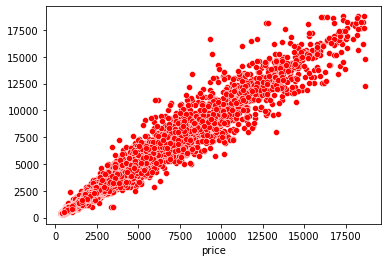

In [155]:
y_pred1 = tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred1, color="red")

In [156]:
score = tree.score(X_test,y_test)
error = mae(y_test,y_pred1)
y_true, Y_pred = np.array(y_test), np.array(y_pred1)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.9702417187582433
305.5993708873654
10.259655419159861
6.900452488687783


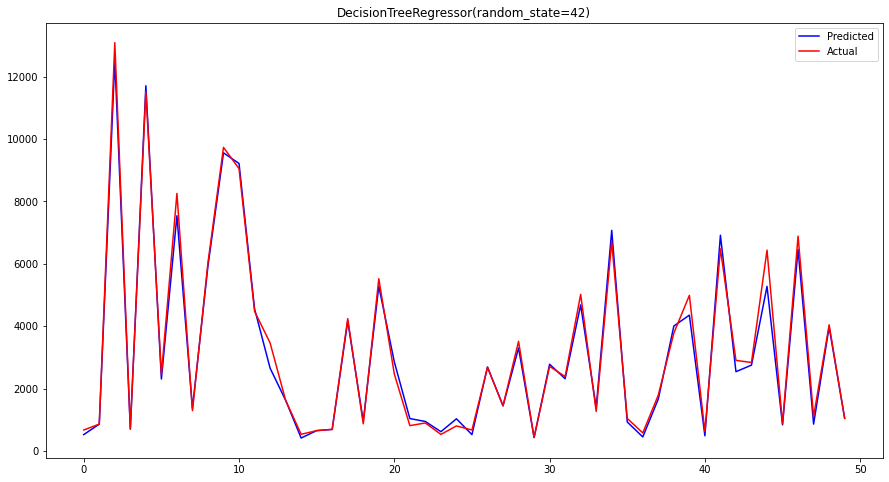

In [157]:
plt.figure(figsize=(15, 8))
y_true, y_pred = np.array(y_test), np.array(y_pred1)
plt.plot(y_pred[0:50], label='Predicted', color="blue")
plt.plot(y_true[0:50], label='Actual', color="red")
plt.title(tree)
plt.legend()

In [158]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_hat = pd.DataFrame(x_quad)
print(X_hat.shape)
X_train,X_test,y_train,y_test = train_test_split(X_hat,y,test_size=0.25, random_state = 0)
rf.fit(X_train, y_train)

(48425, 36)


RandomForestRegressor(random_state=42)

In [159]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.77%
R squared of the Random Forest Regressor on test set: 98.34%


<AxesSubplot:xlabel='price'>

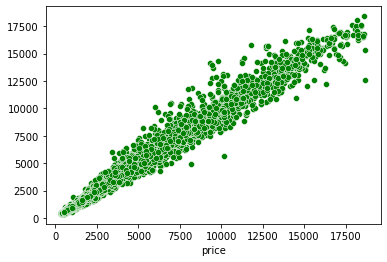

In [160]:
y_pred2 = rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred2, color="green")

In [161]:
d = {'true': y_test, 'predicted': y_pred}
df_lr = pd.DataFrame(data=d)
df_lr['diff'] = df_lr['predicted']-df_lr['true']
df_lr

,true,predicted,diff
28614,675,526.0,-149.0
34412,863,863.0,0.0
24740,13085,12531.0,-554.0
30312,726,701.0,-25.0
23503,11511,11705.0,194.0
...,...,...,...
37790,1000,1069.0,69.0
19794,8362,8213.0,-149.0
20988,9205,10396.0,1191.0
38112,1013,789.0,-224.0


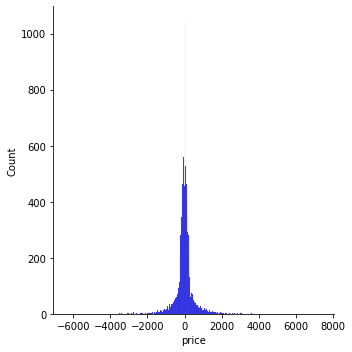

In [162]:
sns.displot(y_pred - y_test, color='blue')

In [163]:
print('Mean Absolute Error of the Linear Regression on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Linear Regression on test set is 305.60


In [164]:
d = {'true': y_test, 'predicted': y_pred1}
df_dt = pd.DataFrame(data=d)
df_dt['diff'] = df_dt['predicted']-df_dt['true']
df_dt

,true,predicted,diff
28614,675,526.0,-149.0
34412,863,863.0,0.0
24740,13085,12531.0,-554.0
30312,726,701.0,-25.0
23503,11511,11705.0,194.0
...,...,...,...
37790,1000,1069.0,69.0
19794,8362,8213.0,-149.0
20988,9205,10396.0,1191.0
38112,1013,789.0,-224.0


In [165]:
print('Mean Absolute Error of the Decision Tree Regressor on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred1)))

Mean Absolute Error of the Decision Tree Regressor on test set is 305.60


In [166]:
d = {'true': y_test, 'predicted': y_pred2}
df_rf = pd.DataFrame(data=d)
df_rf['diff'] = df_rf['predicted']-df_rf['true']
df_rf

,true,predicted,diff
28614,675,552.120833,-122.879167
34412,863,870.250000,7.250000
24740,13085,12857.130833,-227.869167
30312,726,837.425000,111.425000
23503,11511,12343.927000,832.927000
...,...,...,...
37790,1000,1074.880000,74.880000
19794,8362,8114.690000,-247.310000
20988,9205,8842.058750,-362.941250
38112,1013,908.062667,-104.937333


In [167]:
print('Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred2)))

Mean Absolute Error of the Random Forest Regressor on test set is 233.11


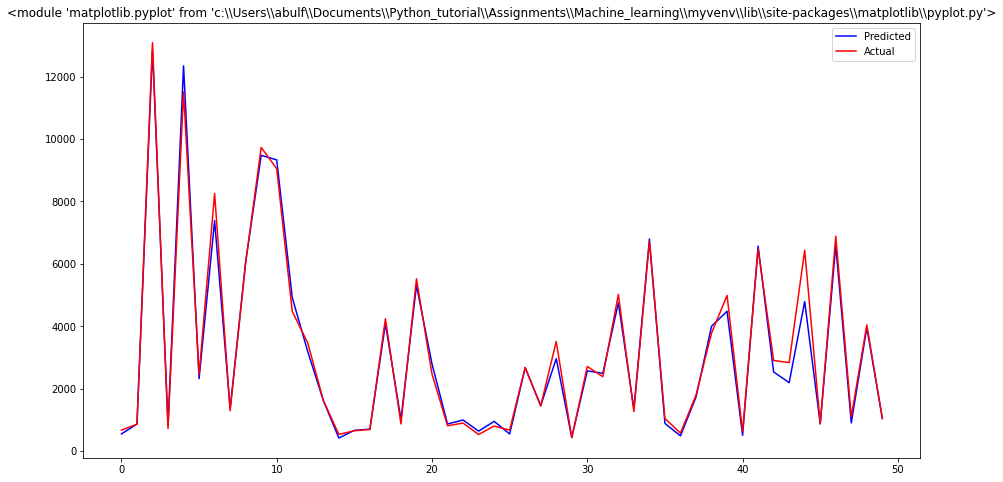

In [168]:
  plt.figure(figsize=(15, 8))
  y_true, y_pred = np.array(y_test), np.array(y_pred2)
  plt.plot(y_pred[0:50], label='Predicted', color="blue")
  plt.plot(y_true[0:50], label='Actual', color="red")
  plt.title(plt)
  plt.legend()

In [169]:
y_true, y_pred = np.array(y_test), np.array(y_pred2)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mape)

8.15106604007436


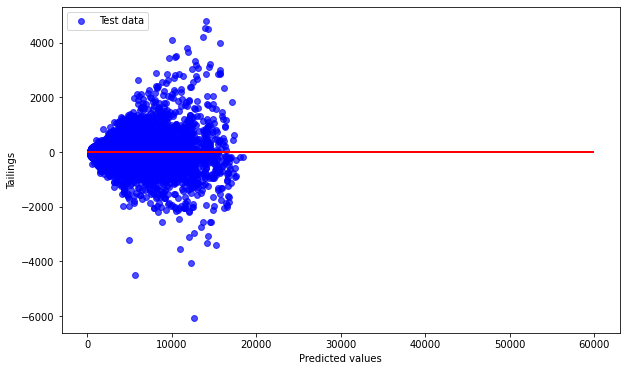

In [170]:
plt.figure(figsize=(10,6))

'''plt.scatter(Y_train_pred,Y_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')'''
plt.scatter(y_pred2,y_pred2 - y_true,
          c = 'b', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [171]:
score = rf.score(X_test,y_test)
error = mae(y_test,y_pred2)
y_true, Y_pred = np.array(y_test), np.array(y_pred2)
mape = np.mean(np.abs((y_true - Y_pred) / y_true)) * 100 #mean absolute percntage error
mdape = np.median((np.abs((y_true - Y_pred)/ y_true))) * 100 #median absolute percntage error
print(score)
print(error)
print(mape)
print(mdape)

0.9833908883244046
233.10782466951426
8.15106604007436
5.699293642785067
